In [1]:
# Load BSNIP data

import pickle
import pandas as pd

# NaN FC: Baltimore_S3130FCP1 Detroit_1570_TR_S1570PVL1
badsub = ['Baltimore_S3130FCP1', 'Detroit_1570_TR_S1570PVL1']
bsnip = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/BSNIP/'

ts = pickle.load(open(f'{bsnip}/bsnip_rc_ts_centered.pkl', 'rb'))
# race = pickle.load(open('../../BSNIP/race.pkl', 'rb'))

for s in badsub:
    del ts[s]
#     del race[s]

# samsung = '/run/media/anton/Samsung_T5'
# bsnip = f'{samsung}/BSNIP'
pheno = f'{bsnip}/Phenotype'

iid = pd.read_csv(f'{pheno}/BSNIP_Imaging_ID.csv')
idb = pd.read_csv(f'{pheno}/BSNIP_Imaging_Database.csv')

print('Complete')

Complete


In [7]:
idb['DXGROUP_1']

0           SZP
1       SADDEPR
2       SADDEPR
3       SADDEPP
4           NaN
         ...   
1853     SADBPP
1854     SADBPP
1855        NaN
1856         NC
1857        SZR
Name: DXGROUP_1, Length: 1858, dtype: object

In [3]:
import numpy as np

ps = dict()

for k,v in ts.items():
    p = np.corrcoef(v)
    a,b = np.triu_indices(264,1)
    ps[k] = p[a,b]
    
print(len(ps.keys()))

1352


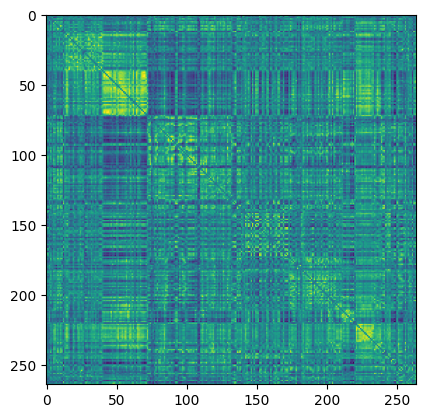

In [4]:
import matplotlib.pyplot as plt

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m + m.T

subs = list(ps.keys())
plt.imshow(vec2mat(ps[subs[401]]))
plt.show()

In [13]:
# Write out data

for k,v in ps.items():
    subname = k.replace('_','.')
    np.save(f'{bsnip}/fc/{subname}_task-unk_fc.npy', v)
    
print('Done')

Done


In [8]:
cat = '''
DXGROUP_1
DXGROUP_2
sex
ethnic
Race
handed
MED_PSYCHOTROPIC
MED_ANTIP_ANY_PRI
MED_ANTIP_FIRSTGEN_SEC
MED_ANTIP_SECONDGEN_SEC
MED_ANTID_ANY_PRI
MED_ANTID_TRICYCLIC_SEC
MED_ANTID_MAOI_SEC
MED_ANTID_SSRI_SEC
MED_ANTID_MISC_SEC
MED_MOOD_ANY_PRI
MED_MOOD_LITHIUM_SEC
MED_MOOD_ANTICONVUL_SEC
MED_ANX_HYP_PRI
MED_ANTICHOL_PRI
MED_CENT_ACTIVE_PRI
MED_STIMULANTS_PRI
'''

num = '''
Age_cal
I2a
PANSS_PosTotal
PANSS_NegTotal
PANSS_GenTotal
PANSS_Total
pt_hollscore
mo_hollscore
fa_hollscore
Family_hollscore
'''

cat = cat.split()
num = num.split()

demo = dict()

for key in cat:
    demo[key] = dict()
    
for key in num:
    demo[key] = dict()

print(list(demo.keys()))

['DXGROUP_1', 'DXGROUP_2', 'sex', 'ethnic', 'Race', 'handed', 'MED_PSYCHOTROPIC', 'MED_ANTIP_ANY_PRI', 'MED_ANTIP_FIRSTGEN_SEC', 'MED_ANTIP_SECONDGEN_SEC', 'MED_ANTID_ANY_PRI', 'MED_ANTID_TRICYCLIC_SEC', 'MED_ANTID_MAOI_SEC', 'MED_ANTID_SSRI_SEC', 'MED_ANTID_MISC_SEC', 'MED_MOOD_ANY_PRI', 'MED_MOOD_LITHIUM_SEC', 'MED_MOOD_ANTICONVUL_SEC', 'MED_ANX_HYP_PRI', 'MED_ANTICHOL_PRI', 'MED_CENT_ACTIVE_PRI', 'MED_STIMULANTS_PRI', 'Age_cal', 'I2a', 'PANSS_PosTotal', 'PANSS_NegTotal', 'PANSS_GenTotal', 'PANSS_Total', 'pt_hollscore', 'mo_hollscore', 'fa_hollscore', 'Family_hollscore']


In [9]:
from math import isnan
import numbers

def get_field(iid, idb, subid, field):
    subid = subid.split('_')[-1]
    pid = iid[iid['StudyID'] == subid]['pid']
    uid = iid[iid['StudyID'] == subid]['UID']
    ser2 = idb[idb['Scan_ID'] == subid]
    again = False
    try:
        if isnan(pid):
            again = True
        elif idb[idb['pid'] == int(pid)].shape[0] != 1:
            again = True
        else:
            ser = idb[idb['pid'] == int(pid)]
            return ser[field].item()
    except:
        again = True
    if again and ser2.shape[0] == 1:
        return ser2[field].item()
    return None

for key in num:
    for k in ts:
        subname = k.replace('_','.')
        v = get_field(iid, idb, k, key)
        if v == 999 or v == None or isinstance(v, str) or (isinstance(v, numbers.Number) and isnan(v)):
            continue
        demo[key][subname] = v
    print(len(demo[key]))
    
for key in cat:
    for k in ts:
        subname = k.replace('_','.')
        v = get_field(iid, idb, k, key)
        if v == 999 or v == '999' or v == None or (isinstance(v, numbers.Number) and isnan(v)):
            continue
        if not isinstance(v, str):
            v = 's'+str(v)
        demo[key][subname] = v
    print(len(demo[key]))
        
print('Done')

1244
561
572
572
571
571
1159
1071
950
1112
1246
1246
1245
1244
1246
1230
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
1224
Done


In [10]:
print(list(demo['Age_cal'].values()))

[23.0, 53.0, 52.0, 51.0, 47.0, 33.0, 41.0, 23.0, 21.0, 35.0, 48.0, 37.0, 42.0, 27.0, 52.0, 28.0, 43.0, 28.0, 52.0, 23.0, 30.0, 49.0, 25.0, 54.0, 45.0, 22.0, 18.0, 38.0, 38.0, 42.0, 55.0, 31.0, 23.0, 53.0, 39.0, 22.0, 53.0, 17.0, 44.0, 52.0, 38.0, 55.0, 24.0, 43.0, 59.0, 56.0, 28.0, 61.0, 42.0, 56.0, 22.0, 53.0, 38.0, 27.0, 57.0, 27.0, 33.0, 25.0, 19.0, 45.0, 47.0, 21.0, 50.0, 27.0, 29.0, 46.0, 30.0, 63.0, 20.0, 45.0, 54.0, 24.0, 22.0, 49.0, 30.0, 47.0, 40.0, 18.0, 27.0, 44.0, 45.0, 50.0, 51.0, 42.0, 35.0, 65.0, 23.0, 24.0, 52.0, 25.0, 58.0, 49.0, 23.0, 27.0, 45.0, 33.0, 19.0, 38.0, 24.0, 40.0, 44.0, 26.0, 53.0, 34.0, 21.0, 52.0, 36.0, 51.0, 63.0, 52.0, 52.0, 46.0, 46.0, 51.0, 21.0, 25.0, 26.0, 25.0, 33.0, 38.0, 49.0, 52.0, 54.0, 21.0, 47.0, 23.0, 31.0, 37.0, 42.0, 37.0, 65.0, 48.0, 50.0, 50.0, 53.0, 25.0, 50.0, 25.0, 52.0, 56.0, 17.0, 27.0, 43.0, 59.0, 54.0, 49.0, 27.0, 51.0, 41.0, 46.0, 58.0, 58.0, 42.0, 40.0, 18.0, 44.0, 18.0, 29.0, 29.0, 44.0, 49.0, 54.0, 33.0, 31.0, 49.0, 22.0, 22.

In [11]:
pickle.dump(demo, open(f'{bsnip}/demographics.pkl', 'wb'))

print('Done')

Done


In [21]:
ls -lh ../../ImageNomer/data/anton/cohorts/BSNIP/demographics.pkl

-rw-r--r-- 1 anton anton 914K Feb 14 18:06 ../../ImageNomer/data/anton/cohorts/BSNIP/demographics.pkl
